In [36]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [37]:
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

In [38]:
len(x_train)

60000

In [39]:
len(x_test)

10000

In [40]:
x_train[0].shape

(28, 28)

In [41]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

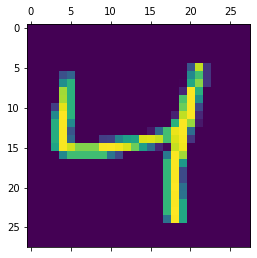

In [42]:
plt.matshow(x_train[2])

In [43]:
y_train[0]

5

In [44]:
x_train=x_train/255
x_test= x_test/255

In [45]:
x_train_flattened= x_train.reshape(len(x_train),28*28)
x_test_flattened= x_test.reshape(len(x_test),28*28)

In [46]:
x_test_flattened.shape

(10000, 784)

In [47]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [48]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4724 - accuracy: 0.8766
Epoch 2/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3041 - accuracy: 0.9148
Epoch 3/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9252
Epoch 6/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2617 - accuracy: 0.9274
Epoch 7/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2584 - accuracy: 0.9282


In [49]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 979us/step - loss: 0.2687 - accuracy: 0.9255


[0.2686527669429779, 0.9254999756813049]

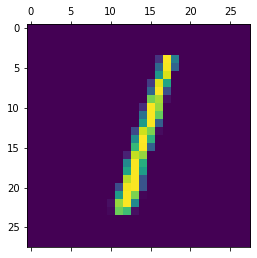

In [50]:
plt.matshow(x_test[2])

In [51]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 833us/step


array([6.75631408e-03, 7.47690976e-08, 3.51989195e-02, 9.51371014e-01,
       2.78224121e-03, 1.05397694e-01, 3.01580684e-07, 9.99845266e-01,
       8.35867226e-02, 5.66905618e-01], dtype=float32)

In [52]:
np.argmax(y_predicted[2])

1

In [54]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [55]:
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [56]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [57]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    4,    2,    0,    7,    6,    2,    3,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    9,  932,   16,    8,    4,   10,   11,   37,    2],
       [   2,    0,   21,  920,    1,   23,    2,   12,   24,    5],
       [   1,    1,    6,    0,  941,    0,    8,    4,    9,   12],
       [   7,    3,    2,   29,   14,  781,   15,    8,   30,    3],
       [  11,    3,    8,    1,    7,   13,  910,    2,    3,    0],
       [   1,    6,   25,    4,   10,    1,    0,  960,    3,   18],
       [   5,    7,    7,   18,    9,   20,    9,   12,  882,    5],
       [   8,    7,    2,    9,   65,    6,    0,   38,   12,  862]])>